<a href="https://colab.research.google.com/github/tiwari1917/62-Leetcode-Solution-Python-/blob/main/Autism_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies

In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle


Data loading



In [191]:
#read csv data to pandas data frame
df = pd.read_csv('/content/train.csv')

**Initial Inspection**

In [192]:
df.shape

(800, 22)

In [193]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [194]:
df.tail()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
795,796,0,1,0,0,0,0,0,0,1,1,16.597187,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,1,20.703001,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,0,5.711481,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,0,16.414305,f,?,no,no,Canada,no,9.069342,18 and more,Self,0
799,800,0,1,0,0,0,0,0,0,0,0,46.966113,f,?,no,no,United Arab Emirates,yes,2.243304,18 and more,Self,0


In [195]:
#display all the column of a dataframe
pd.set_option('display.max_columns', None)

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [197]:
#convert ag col to integer
df["age"] = df["age"].astype(int)

In [198]:
df.head(2)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,18 and more,Self,0


In [199]:
for col in df.columns:
  numerical_features =["ID", "age","result"]
  if col not in numerical_features:
    print(col, df[col].unique())
    print("-"*50)

A1_Score [1 0]
--------------------------------------------------
A2_Score [0 1]
--------------------------------------------------
A3_Score [1 0]
--------------------------------------------------
A4_Score [0 1]
--------------------------------------------------
A5_Score [1 0]
--------------------------------------------------
A6_Score [0 1]
--------------------------------------------------
A7_Score [1 0]
--------------------------------------------------
A8_Score [0 1]
--------------------------------------------------
A9_Score [1 0]
--------------------------------------------------
A10_Score [1 0]
--------------------------------------------------
gender ['f' 'm']
--------------------------------------------------
ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
--------------------------------------------------
jaundice ['no' 'yes']
--------------------------------------------------
austim

In [200]:
df = df.drop(columns =["ID", "age_desc"])

In [201]:
df.shape


(800, 20)

In [202]:
df.head(2)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0


In [203]:
 df["contry_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [204]:
#define the mapping dictionary
mapping = {
    "Viet Nam": "Vietnam",
    "AmericanSamoa": "United States",
    "Hong Kong": "China",
}
df["contry_of_res"] = df["contry_of_res"].replace(mapping)

In [205]:
#target class distribution
df["Class/ASD"].value_counts()

,count
Class/ASD,
0,639
1,161


**Insites**
1. missing value ion ethnicity & relation
2. age_desc column has 1 unique value. So it is removed as it is not important for prediction
3. fixed country names
4. identified class imbalance in the target column

Exploratory Data Analysis(EDA)

In [206]:
#oversampling
df.describe()


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


**Univariate** **analysis**

Numerical Column
>Age
>result

In [207]:

sns.set_theme(style="darkgrid")


Mean Age: 27.96375
Median Age: 24.0


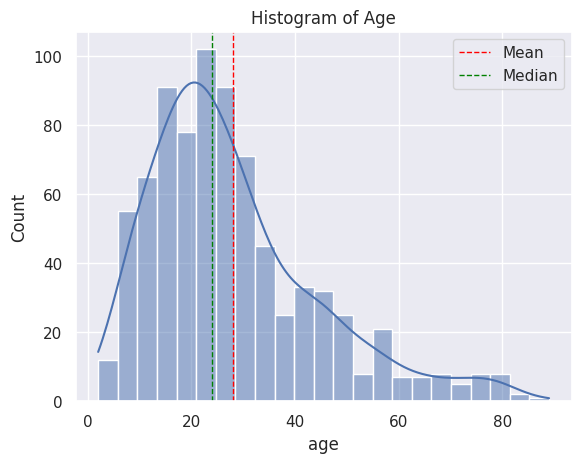

In [208]:
#histogram for "age"
sns.histplot(df["age"], kde=True)
plt.title("Histogram of Age")
#mean and median
age_mean = df["age"].mean()
age_median = df["age"].median()
print("Mean Age:", age_mean)
print("Median Age:", age_median)
#add vertical lines to show mean and median
plt.axvline(age_mean, color="red", linestyle="dashed", linewidth=1, label="Mean")
plt.axvline(age_median, color="green", linestyle="dashed", linewidth=1, label="Median")
plt.legend()
plt.show()

Mean Age: 8.537303106501248
Median Age: 9.605299308


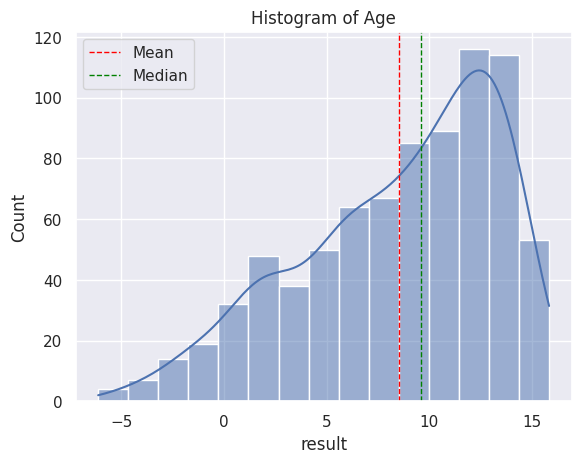

In [209]:
#histogram for "result"
sns.histplot(df["result"], kde=True)
plt.title("Histogram of Age")
#mean and median
result_mean = df["result"].mean()
result_median = df["result"].median()
print("Mean Age:", result_mean)
print("Median Age:", result_median)
#add vertical lines to show mean and median
plt.axvline(result_mean, color="red", linestyle="dashed", linewidth=1, label="Mean")
plt.axvline(result_median, color="green", linestyle="dashed", linewidth=1, label="Median")
plt.legend()
plt.show()

**Box plots for identifing the outlier**

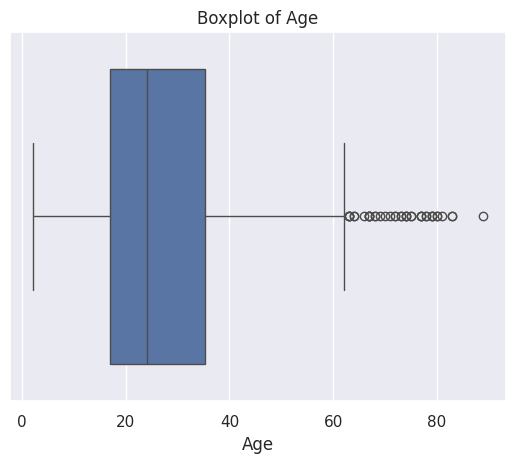

In [210]:
#Boxpplot
sns.boxplot(x=df["age"])
plt.title("Boxplot of Age")
plt.xlabel("Age")

plt.show()

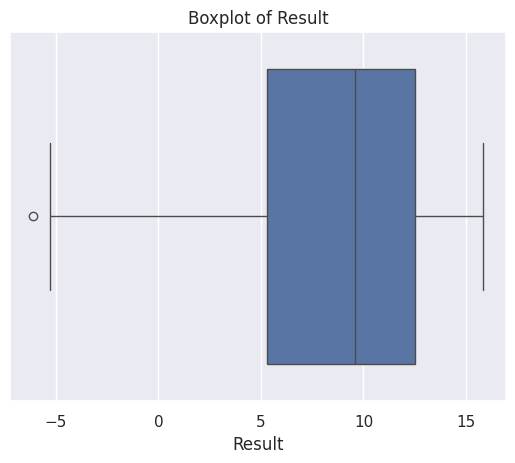

In [211]:
#box plot
sns.boxplot(x=df["result"])
plt.title("Boxplot of Result")
plt.xlabel("Result")

plt.show()

In [212]:
#count outlier using TQR method
Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
age_outliers = df[(df["age"] < lower_bound) | (df["age"] > upper_bound)]

In [213]:
age_outliers

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
19,1,1,1,1,1,1,1,1,1,1,72,m,White-European,no,yes,United States,yes,12.286905,Self,1
31,0,1,0,0,0,0,0,1,0,0,74,f,Asian,no,no,Jordan,no,2.412387,Self,0
33,1,1,1,1,1,1,1,0,1,1,67,m,White-European,yes,no,New Zealand,no,11.647281,Self,0
41,1,1,1,1,1,0,1,1,1,1,74,m,White-European,no,no,United Kingdom,no,7.387992,Self,0
92,0,1,1,1,1,1,0,1,1,1,75,m,Latino,no,yes,United States,no,6.699799,Self,0
93,0,0,0,0,0,0,0,0,0,0,79,m,?,no,no,India,no,7.813125,Self,0
161,1,1,1,1,1,1,1,1,1,1,79,f,White-European,yes,yes,United States,no,10.482143,Self,0
231,1,1,1,1,1,1,1,1,1,1,69,f,White-European,no,no,United States,no,2.459004,Self,1
238,1,1,1,1,1,0,1,1,1,1,64,f,Latino,yes,no,Australia,no,13.756476,Self,1
241,0,0,0,0,0,0,0,0,1,0,64,f,others,no,no,Jordan,no,2.142376,Self,0


In [214]:
len(  age_outliers)

39

In [215]:
#count outlier using TQR method
Q1 = df["result"].quantile(0.25)
Q3 = df["result"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
result_outliers = df[(df["result"] < lower_bound) | (df["result"] > upper_bound)]

In [216]:
len(result_outliers)

1

In [217]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

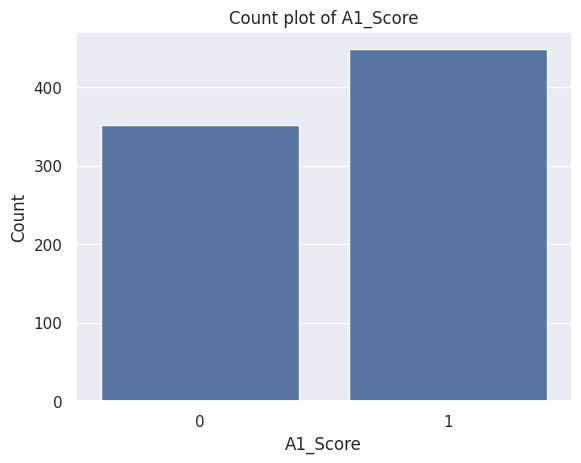

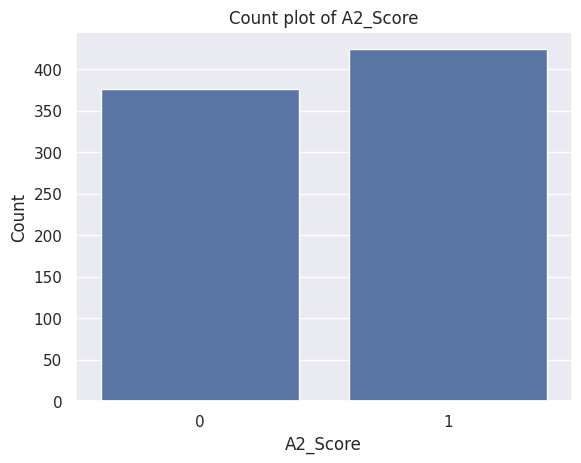

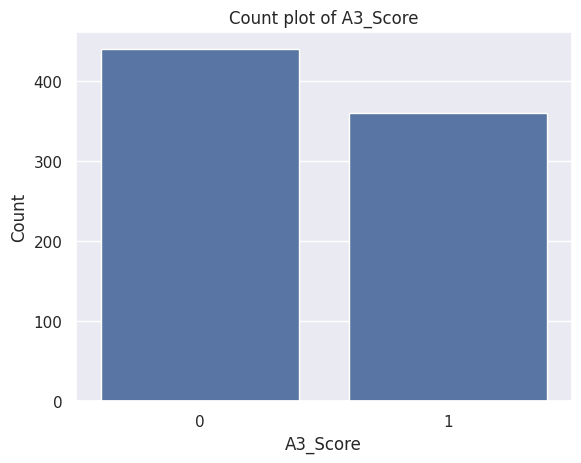

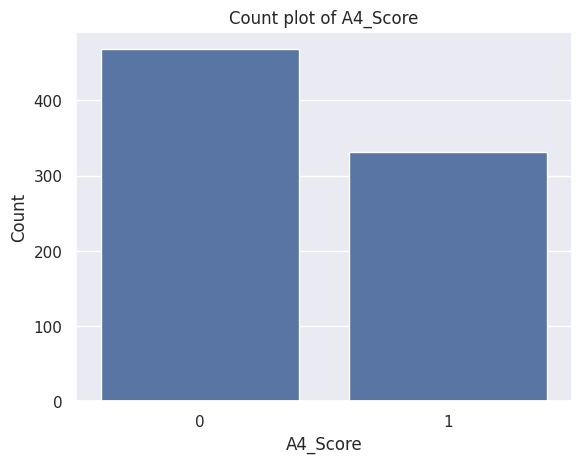

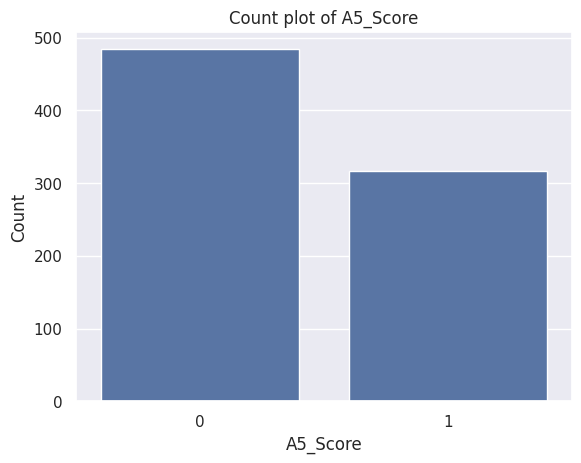

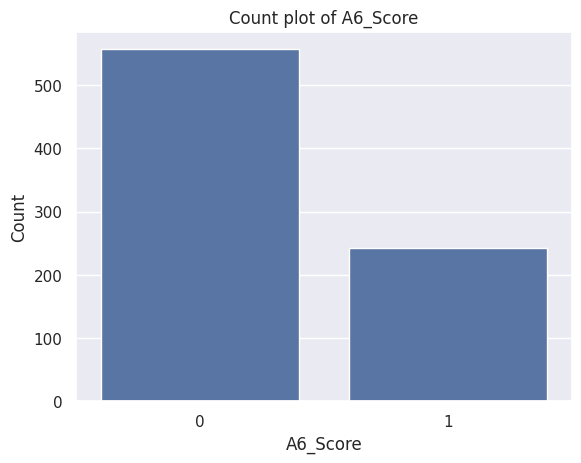

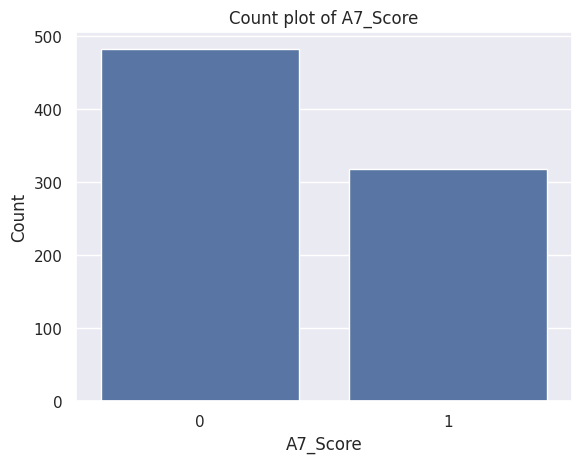

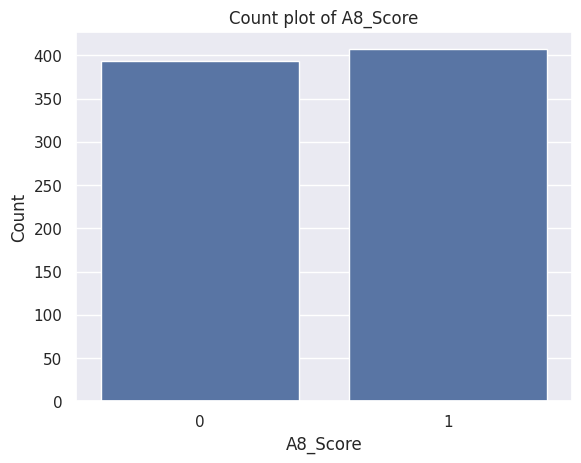

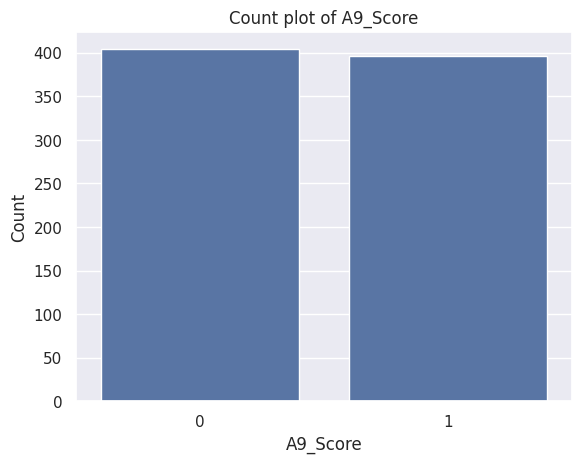

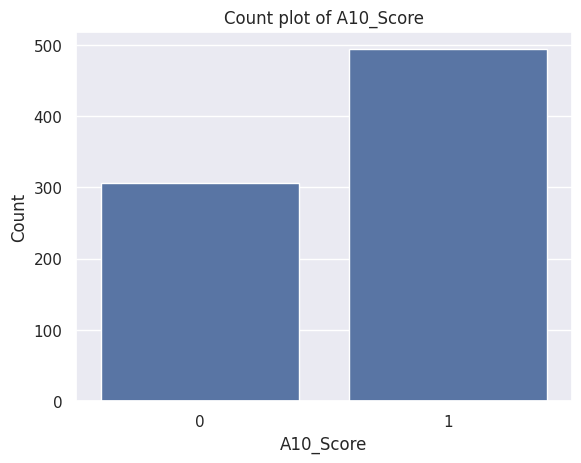

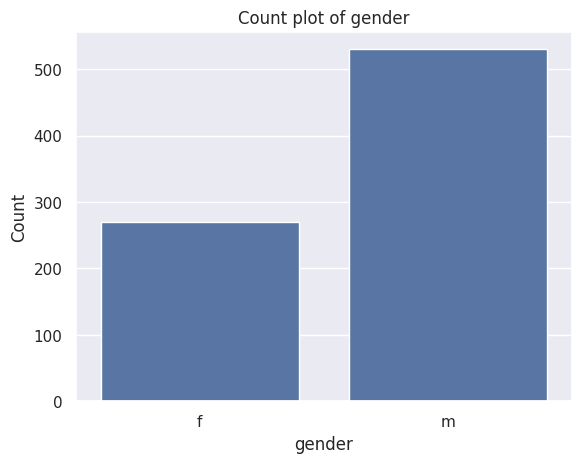

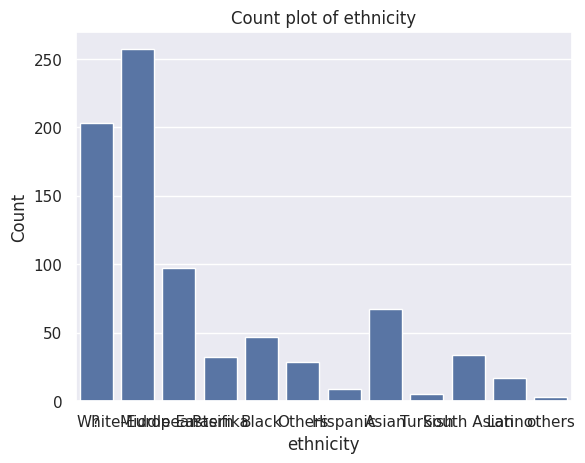

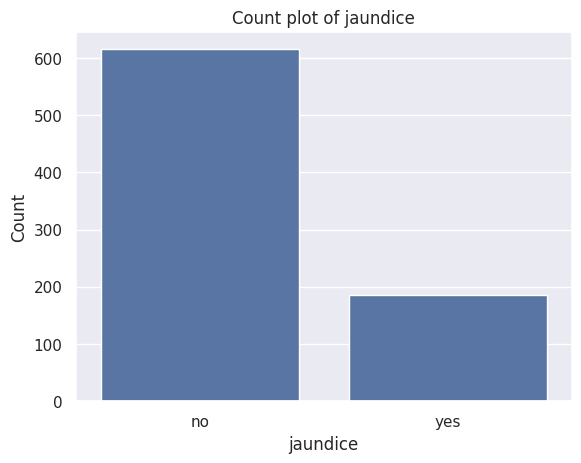

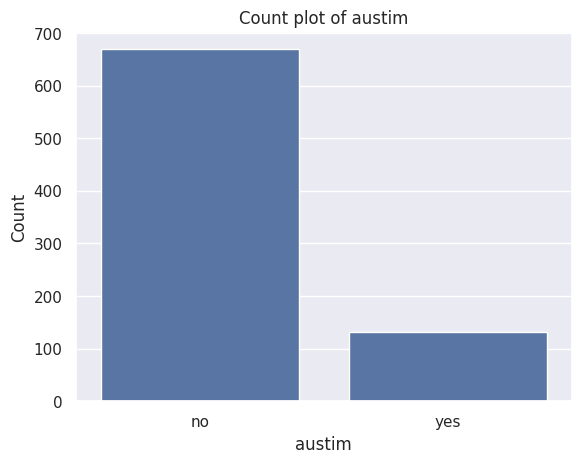

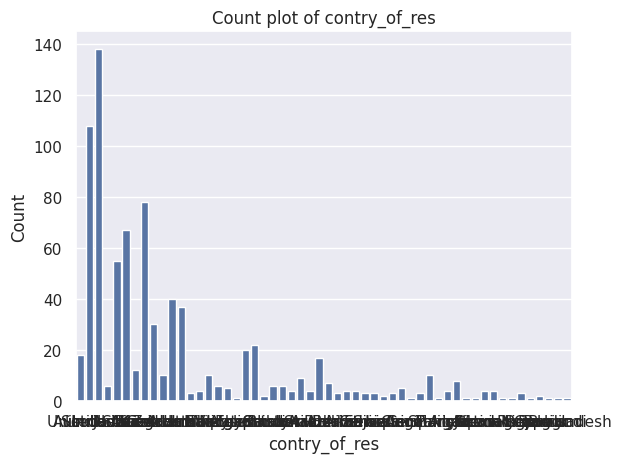

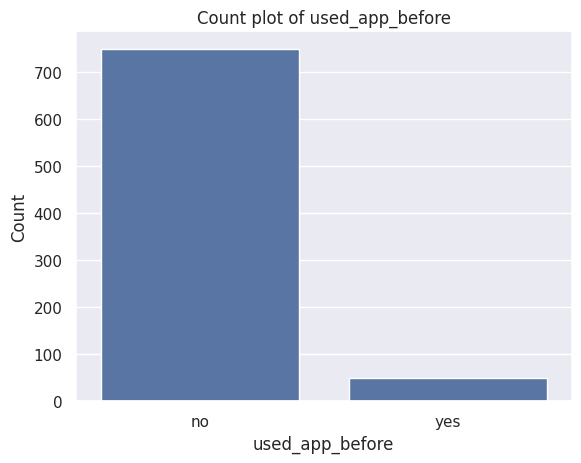

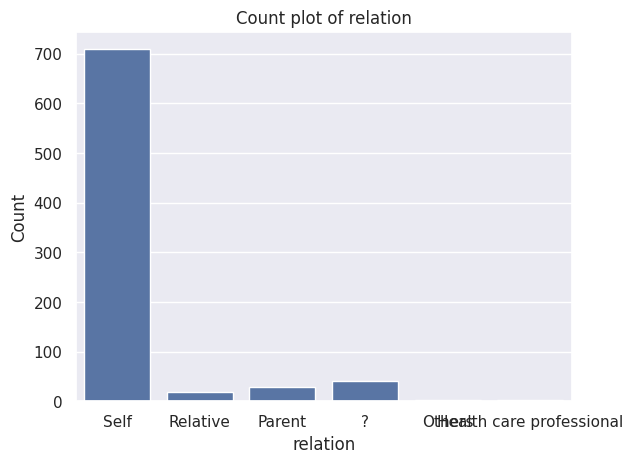

In [218]:
categorical_columns = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before'
       , 'relation']

for col in categorical_columns:
  sns.countplot(x=df[col])
  plt.title(f"Count plot of {col}")
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.show()

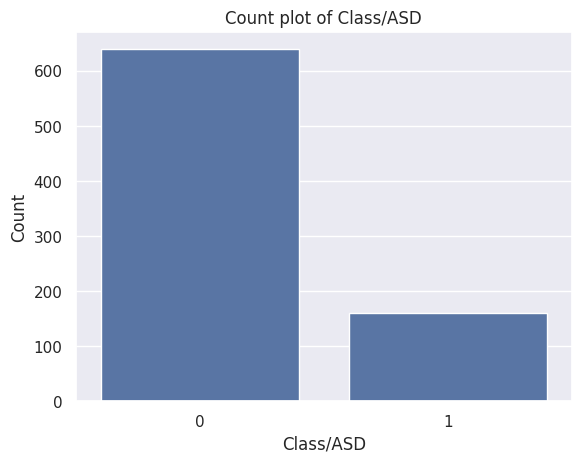

In [219]:
#complete for target column(Class/ASD)
sns.countplot(x=df["Class/ASD"])
plt.title("Count plot of Class/ASD")
plt.xlabel("Class/ASD")
plt.ylabel("Count")
plt.show()


In [220]:
df["Class/ASD"].value_counts()

,count
Class/ASD,
0,639
1,161


**Handling missing value ethnicity and relation column**

In [221]:
df["ethnicity"] = df["ethnicity"].replace({"?": "Others", "others": "Others"})
df["relation"].unique()

array(['Self', 'Relative', 'Parent', '?', 'Others',
       'Health care professional'], dtype=object)

In [222]:
df["relation"] = df["relation"].replace(
    {"?": "Others",
     "Relative": "Others",
     "Parent": "Others",
     "Health care profession":"Others"}
)

In [223]:
df["relation"].unique()

array(['Self', 'Others', 'Health care professional'], dtype=object)

**Lable Encoding**

In [224]:
# identify columns with "object" data type
object_columns = df.select_dtypes(include=["object"]).columns
print(object_columns)

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')


In [225]:
encoders = {}
for column in object_columns:
  label_encoder = LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column])
  encoders[column] = label_encoder
  with open(f"{column}_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)

In [226]:
encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

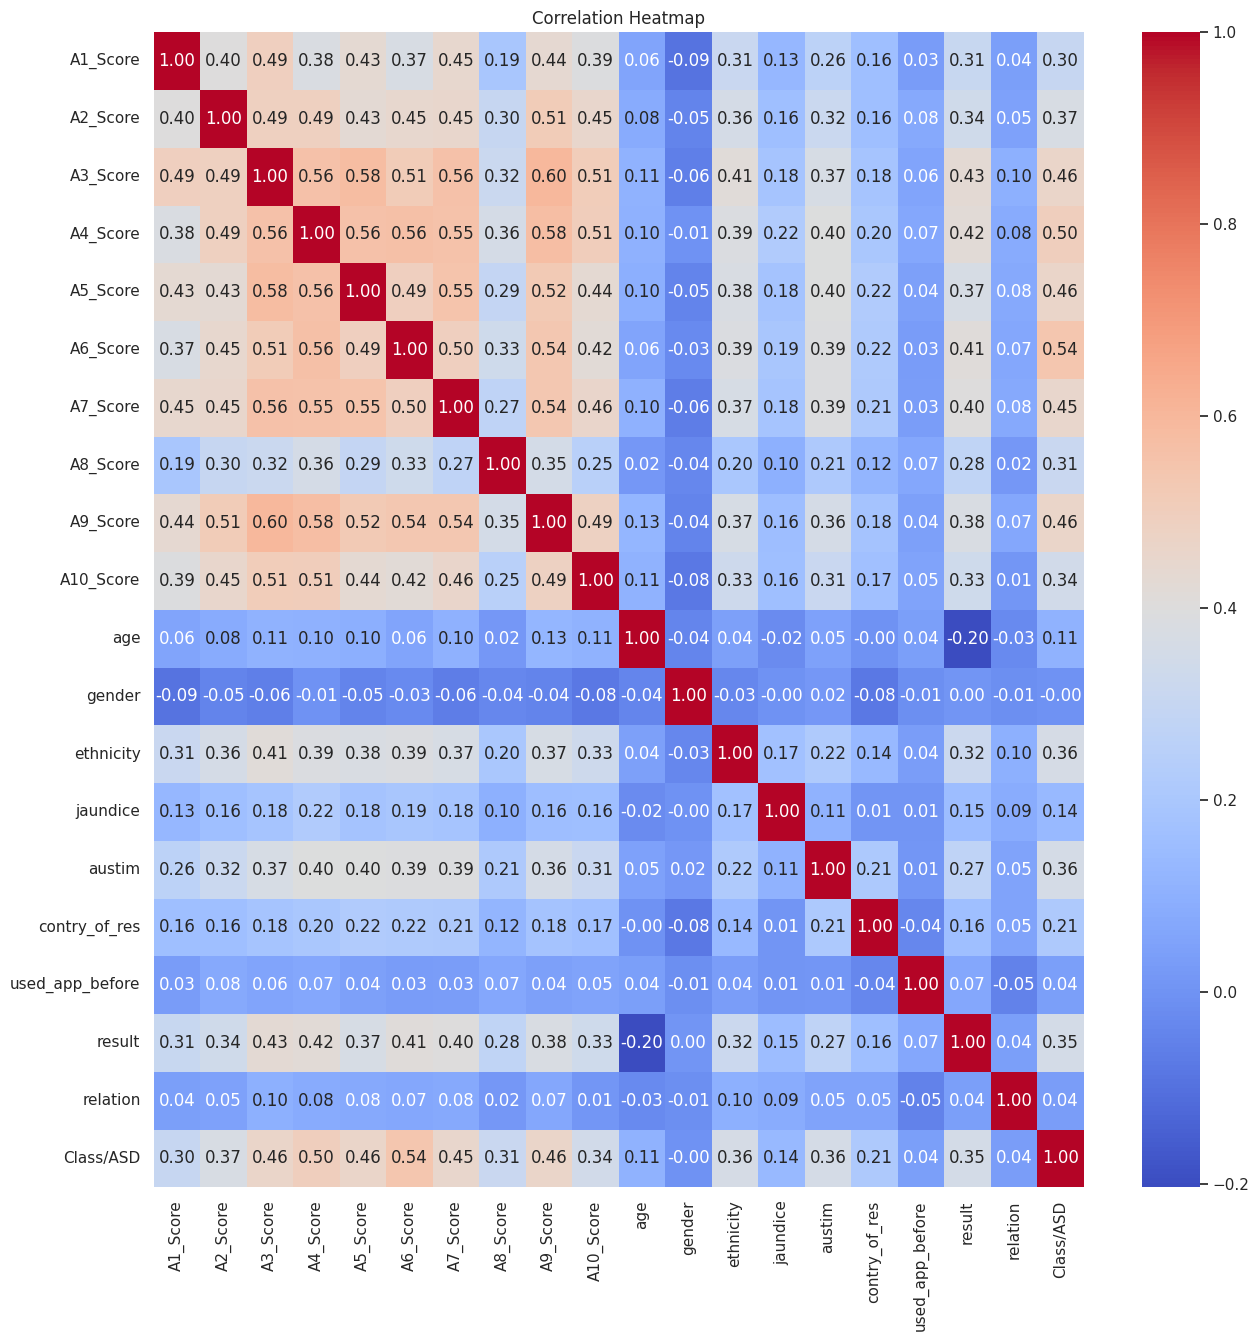

In [227]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**Insights from EDA**


There are few outliers in the numerical columns(age, result)

There is a class imbalance in the target column

There is a class imbalance in the categorical Features

We don't have any highly correlated column

performed label encoding and saved the encoders

Data preprocessing


In [228]:
#function to replace the utlier with mediam
def replace_outliers_with_median(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  # replace outlier with meedian value
  median = df[column].median()
  df[column] =df[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)
  return df

In [229]:
df = replace_outliers_with_median(df, "age")

df= replace_outliers_with_median(df, "result")

In [230]:
df.shape

(800, 20)

**Train Test Split**

In [231]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [232]:
x = df.drop(columns=["Class/ASD"])
y = df["Class/ASD"]

In [233]:
print(x)

     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         0         1         0         1         0         1   
1           0         0         0         0         0         0         0   
2           1         1         1         1         1         1         1   
3           0         0         0         0         0         0         0   
4           0         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
795         0         1         0         0         0         0         0   
796         0         1         1         0         0         1         0   
797         0         0         0         0         0         0         0   
798         0         0         0         0         0         0         0   
799         0         1         0         0         0         0         0   

     A8_Score  A9_Score  A10_Score   age  gender  ethnicity  jaundice  aust

In [234]:
print(y)

0      0
1      0
2      1
3      0
4      0
      ..
795    0
796    0
797    0
798    0
799    0
Name: Class/ASD, Length: 800, dtype: int64


In [235]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(y_train.shape)
print(y_test.shape)

(640,)
(160,)


In [236]:
print(y_train.value_counts())
print(y_test.value_counts())

Class/ASD
0    515
1    125
Name: count, dtype: int64
Class/ASD
0    124
1     36
Name: count, dtype: int64


SMOTE(synthetic Minority Oversampling Techique)

In [237]:
smote =SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [238]:
print(y_train_resampled.shape)
print(y_train_resampled.value_counts())

(1030,)
Class/ASD
1    515
0    515
Name: count, dtype: int64


Model Training

In [239]:

#list of classifiers
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

# Initialize dictionary to store cross-validation scores
cv_scores = {}

for model_name, model_obj in models.items(): # Iterate through key-value pairs
    print(f"Training {model_name} with default parameters...")
    scores = cross_val_score(model_obj, x_train_resampled, y_train_resampled, cv=5, scoring="accuracy")
    cv_scores[model_name] = np.mean(scores) # Store the mean score
    print(f"{model_name} Cross-Validation Accuracy: {np.mean(scores):.2f}")
    print("-"*50)

Training Decision Tree with default parameters...
Decision Tree Cross-Validation Accuracy: 0.86
--------------------------------------------------
Training Random Forest with default parameters...
Random Forest Cross-Validation Accuracy: 0.92
--------------------------------------------------
Training XGBoost with default parameters...
XGBoost Cross-Validation Accuracy: 0.90
--------------------------------------------------


In [240]:
cv_scores

{'Decision Tree': np.float64(0.8563106796116504),
 'Random Forest': np.float64(0.9194174757281554),
 'XGBoost': np.float64(0.903883495145631)}

Model Selection & Hyperparameter tuning

In [241]:
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgboost_classifier = XGBClassifier(random_state=42)

In [242]:
param_grid_dt = {
        "criterion": ["gini", "entropy"],
        "max_depth": [None, 5, 10,15],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    }


param_grid_rf = {
        "n_estimators": [50, 100, 200, 500],
        "max_depth": [None, 5, 10, 15],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    }

param_grid_xgb = {
        "n_estimators": [50, 100,200,500],
        "max_depth": [3, 5, 7, 10],
        "learning_rate": [0.01, 0.1, 0.2, 0.3],
        "subsample": [0.5, 0.7, 1.0],
        "colsample_bytree": [0.5, 0.7, 1.0]
    }



In [243]:
#hyperparameter tuning for 3 tree based models
#the below step can be automated by using a for loop or by using a pipeline
#perform Randomizationseachcv for each model
random_search_dt = RandomizedSearchCV(estimator=decision_tree, param_distributions=param_grid_dt, n_iter=10, cv=5, scoring="accuracy", random_state=42)
random_search_rf = RandomizedSearchCV(estimator=random_forest, param_distributions=param_grid_rf, n_iter=10, cv=5, scoring="accuracy", random_state=42)
random_search_xgb = RandomizedSearchCV(estimator=xgboost_classifier, param_distributions=param_grid_xgb, n_iter=10, cv=5, scoring="accuracy", random_state=42)


In [244]:
#fit the models
random_search_dt.fit(x_train_resampled, y_train_resampled)
random_search_rf.fit(x_train_resampled, y_train_resampled)
random_search_xgb.fit(x_train_resampled, y_train_resampled)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 500],
                                        'subsample': [0.5, 0.7, 1.0]},
                   random_state=42, scoring='accuracy')

In [245]:
print(random_search_dt.best_estimator_)
print(random_search_dt.best_score_)

print(random_search_rf.best_estimator_)
print(random_search_rf.best_score_)


DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)
0.8776699029126214
RandomForestClassifier(min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, random_state=42)
0.9048543689320387


In [246]:
#get the model with best score
best_model = None
best_score = 0
if random_search_dt.best_score_ > best_score:
  best_model = random_search_dt.best_estimator_
  best_score = random_search_dt.best_score_

if random_search_rf.best_score_ > best_score:
  best_model = random_search_rf.best_estimator_
  best_score = random_search_rf.best_score_

if random_search_xgb.best_score_ > best_score:
  best_model = random_search_xgb.best_estimator_
  best_score = random_search_xgb.best_score_

In [247]:
print(f"Best Model: {best_model}")
print(f"best Cross-Validation Accuracy: {best_score:.2f}")


Best Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
best Cross-Validation Accuracy: 0.91


In [248]:
with open("best_model.pkl", "wb") as f:
  pickle.dump(best_model, f)

**Evaluation**

In [249]:
#evaluate test data
y_test_pred = best_model.predict(x_test)
print("Accuracy score:\n",accuracy_score(y_test, y_test_pred))
print("confusion_matrix:\n", confusion_matrix(y_test, y_test_pred))
print("classification_report:\n", classification_report(y_test, y_test_pred))

Accuracy score:
 0.8125
confusion_matrix:
 [[106  18]
 [ 12  24]]
classification_report:
               precision    recall  f1-score   support

           0       0.90      0.85      0.88       124
           1       0.57      0.67      0.62        36

    accuracy                           0.81       160
   macro avg       0.73      0.76      0.75       160
weighted avg       0.82      0.81      0.82       160



Build a predictive system with encoder and modelfile